<a href="https://colab.research.google.com/github/HAFIZMUHAMMADUSMANZAHOOR/Counter/blob/main/weather_for_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather = pd.read_csv("/content/weatherHistory.csv")


In [4]:
weather.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
weather.memory_usage().sum()/1024**2

6.779144287109375

In [6]:
weather.shape

(74045, 12)

In [7]:
print(weather.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
num_rows, num_columns = weather.shape
print(f'Number of rows: {num_rows}')

Number of rows: 1461


In [ ]:
print(f'Number of columns: {num_columns}')

Number of columns: 6


In [ ]:
memory_usage = weather.memory_usage(deep=True)
total_memory = memory_usage.sum()
print(f'Total memory consumed by the dataset: {total_memory} bytes')


Total memory consumed by the dataset: 233306 bytes


In [ ]:
print(memory_usage)


Index              128
date             97887
precipitation    11688
temp_max         11688
temp_min         11688
wind             11688
weather          88539
dtype: int64


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
missing_values = weather.isnull().sum()

In [ ]:
missing_values

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
missing_values = missing_values[missing_values > 0]

In [ ]:
missing_values

Series([], dtype: int64)

In [ ]:
duplicates = weather.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')


Number of duplicate rows: 0


In [ ]:
weather['date'] = pd.to_datetime(weather['date'])

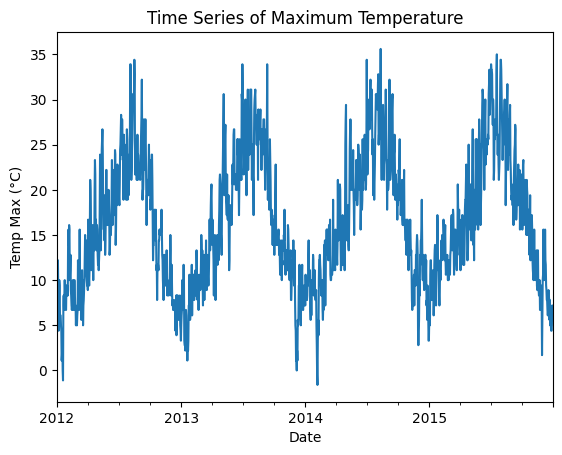

In [ ]:
weather.set_index('date')['temp_max'].plot()
plt.title('Time Series of Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('Temp Max (°C)')
plt.show()

In [ ]:
# Summary statistics
print("Precipitation Summary Statistics:")
print(weather['precipitation'].describe())

Precipitation Summary Statistics:
count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64


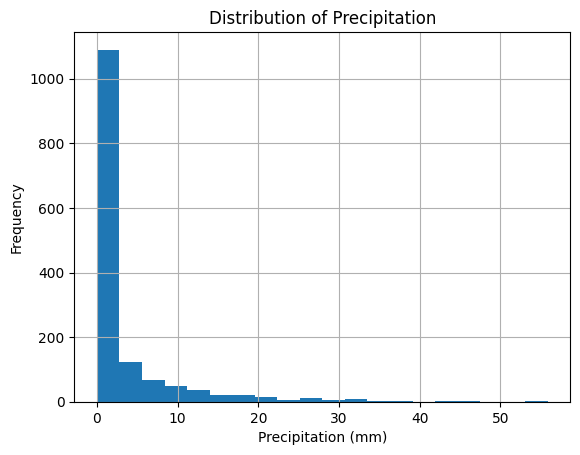

In [ ]:
# Histogram for distribution
weather['precipitation'].hist(bins=20)
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

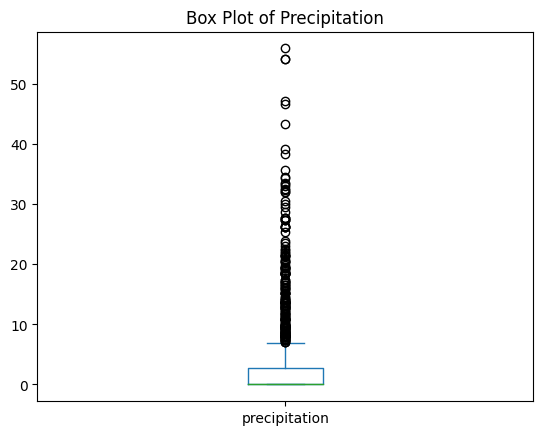

In [ ]:
# Box plot for outliers
weather['precipitation'].plot(kind='box')
plt.title('Box Plot of Precipitation')
plt.show()

In [ ]:
print("Maximum Temperature Summary Statistics:")
print(weather['temp_max'].describe())

Maximum Temperature Summary Statistics:
count    1461.000000
mean       16.439083
std         7.349758
min        -1.600000
25%        10.600000
50%        15.600000
75%        22.200000
max        35.600000
Name: temp_max, dtype: float64


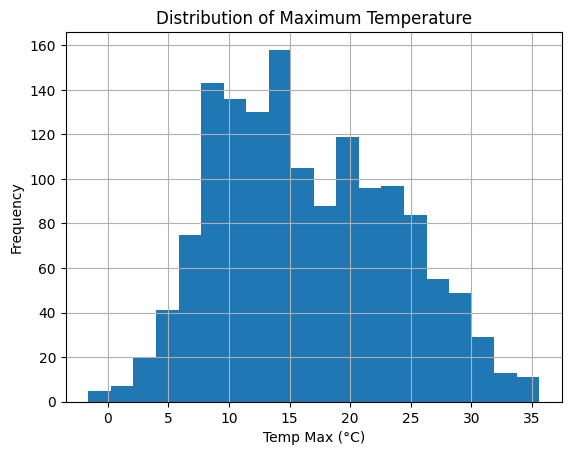

In [ ]:
weather['temp_max'].hist(bins=20)
plt.title('Distribution of Maximum Temperature')
plt.xlabel('Temp Max (°C)')
plt.ylabel('Frequency')
plt.show()

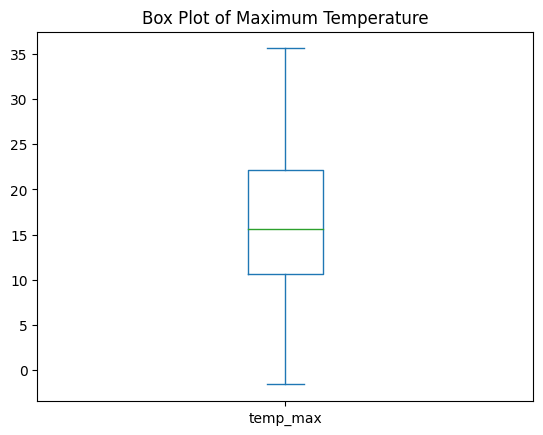

In [ ]:
weather['temp_max'].plot(kind='box')
plt.title('Box Plot of Maximum Temperature')
plt.show()

In [ ]:
print("Minimum Temperature Summary Statistics:")
print(weather['temp_min'].describe())

Minimum Temperature Summary Statistics:
count    1461.000000
mean        8.234771
std         5.023004
min        -7.100000
25%         4.400000
50%         8.300000
75%        12.200000
max        18.300000
Name: temp_min, dtype: float64


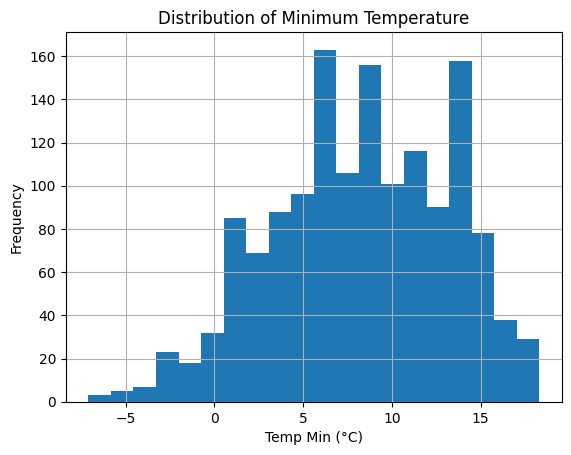

In [ ]:
weather['temp_min'].hist(bins=20)
plt.title('Distribution of Minimum Temperature')
plt.xlabel('Temp Min (°C)')
plt.ylabel('Frequency')
plt.show()

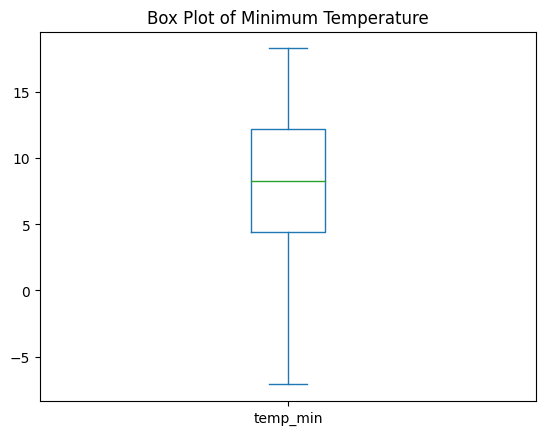

In [ ]:
weather['temp_min'].plot(kind='box')
plt.title('Box Plot of Minimum Temperature')
plt.show()

In [ ]:
print("Wind Speed Summary Statistics:")
print(weather['wind'].describe())

Wind Speed Summary Statistics:
count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64


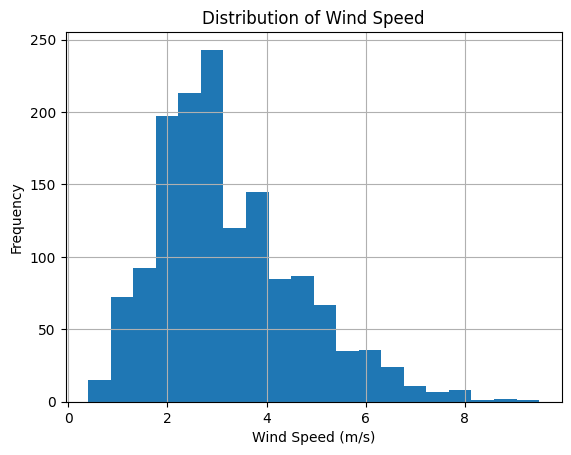

In [ ]:
weather['wind'].hist(bins=20)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

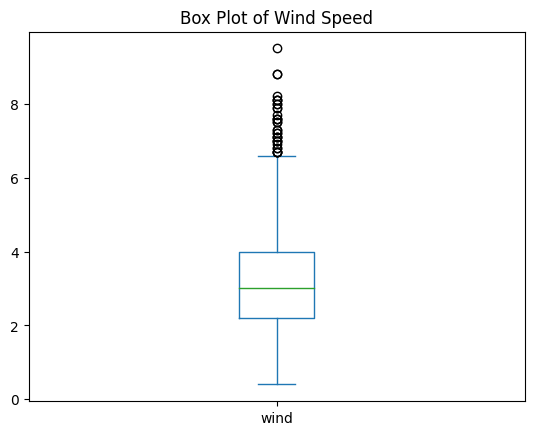

In [ ]:
weather['wind'].plot(kind='box')
plt.title('Box Plot of Wind Speed')
plt.show()

In [ ]:
print("Frequency of Weather Types:")
print(weather['weather'].value_counts())

Frequency of Weather Types:
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


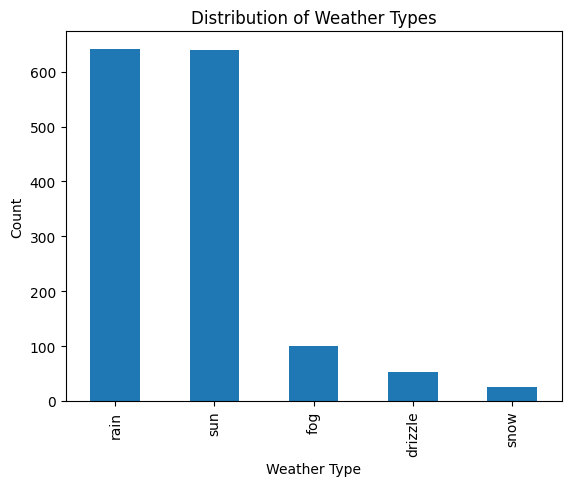

In [ ]:
weather['weather'].value_counts().plot(kind='bar')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

# >  Relationship Between Maximum and Minimum Temperature****

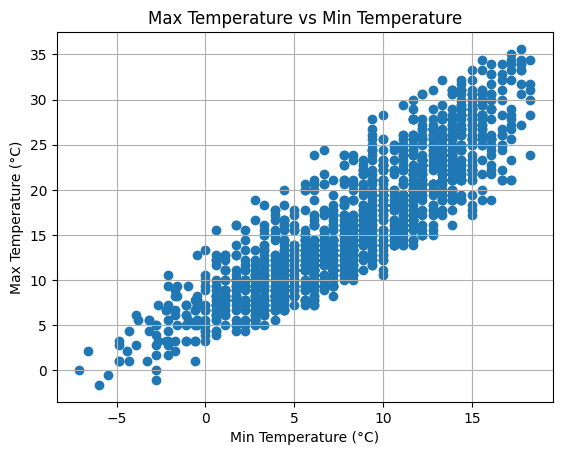

In [ ]:
plt.scatter(weather['temp_min'], weather['temp_max'])
plt.title('Max Temperature vs Min Temperature')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Max Temperature (°C)')
plt.grid()
plt.show()


## Precipitation and Maximum Temperature ****

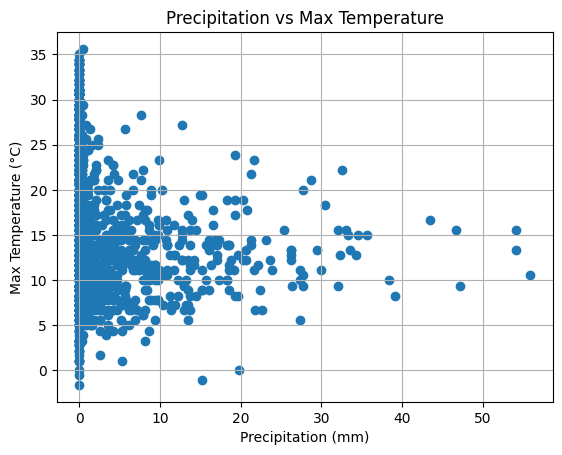

In [ ]:
plt.scatter(weather['precipitation'], weather['temp_max'])
plt.title('Precipitation vs Max Temperature')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Max Temperature (°C)')
plt.grid()
plt.show()


# Wind Speed and Temperature> ****

> Wind Speed vs Max Temperature

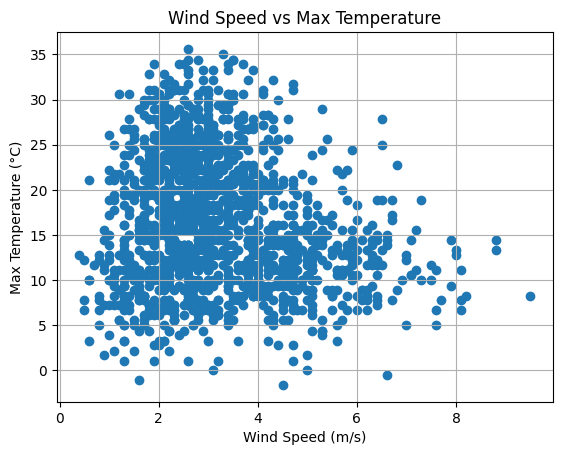

In [ ]:
plt.scatter(weather['wind'], weather['temp_max'])
plt.title('Wind Speed vs Max Temperature')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Max Temperature (°C)')
plt.grid()
plt.show()

**Wind Speed vs Min Temperature**

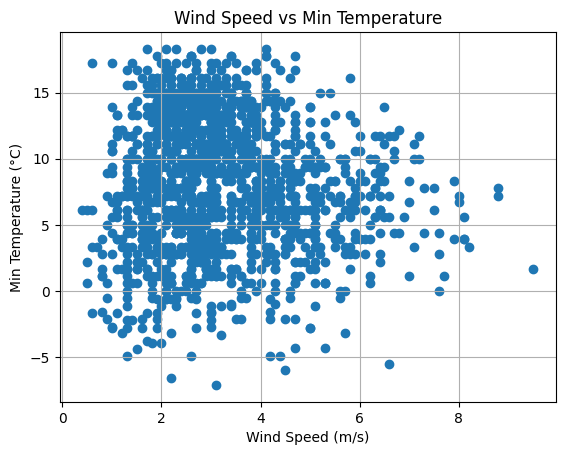

In [ ]:
plt.scatter(weather['wind'], weather['temp_min'])
plt.title('Wind Speed vs Min Temperature')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Min Temperature (°C)')
plt.grid()
plt.show()

# Box Plot of Maximum Temperature by Weather Type> ****

<Figure size 1200x600 with 0 Axes>

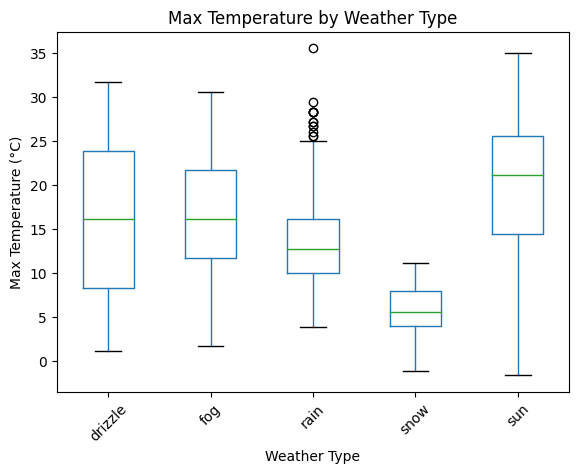

In [ ]:
plt.figure(figsize=(12, 6))
weather.boxplot(column='temp_max', by='weather', grid=False)
plt.title('Max Temperature by Weather Type')
plt.suptitle('')
plt.xlabel('Weather Type')
plt.ylabel('Max Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

# Correlation Matrix> ****

In [ ]:
correlation_matrix = weather[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
print(correlation_matrix)

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


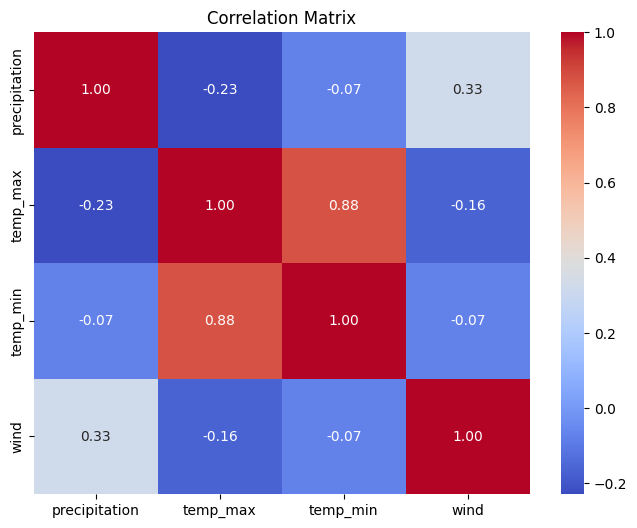

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Questions for Analysis> ******
Temperature Trends
   . How do the maximum and minimum temperatures vary over time?
   . Are there any noticeable trends or patterns in temperature changes throughout the                          years?

In [ ]:
weather['date'] = pd.to_datetime(weather['date'])

In [ ]:
weather.set_index('date', inplace=True)

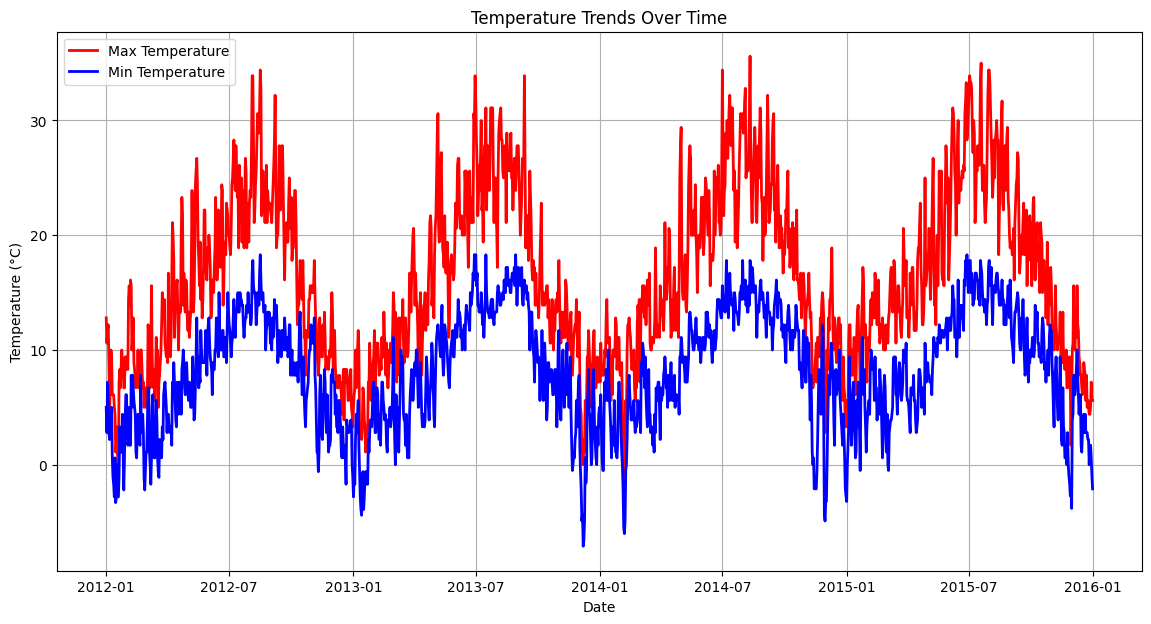

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(weather.index, weather['temp_max'], label='Max Temperature', color='red', linewidth=2)
plt.plot(weather.index, weather['temp_min'], label='Min Temperature', color='blue', linewidth=2)
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


# Precipitation Impact> ******
  . What is the relationship between precipitation and temperature?
  . Does higher precipitation correlate with lower maximum temperatures?

**Scatter Plot of Precipitation vs. Maximum Temperature**

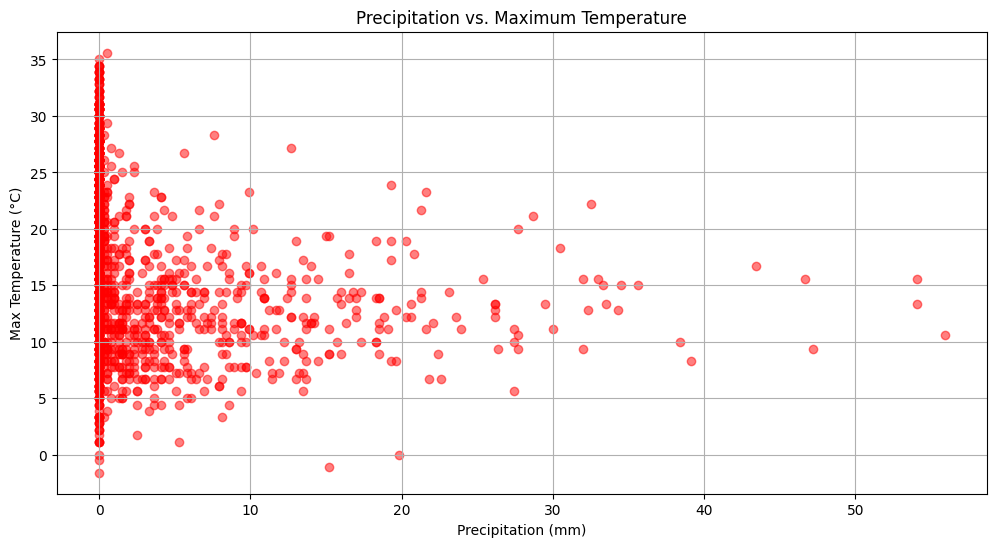

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(weather['precipitation'], weather['temp_max'], alpha=0.5, color='red')
plt.title('Precipitation vs. Maximum Temperature')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Max Temperature (°C)')
plt.grid()
plt.show()


**Scatter Plot of Precipitation vs. Minimum Temperature**

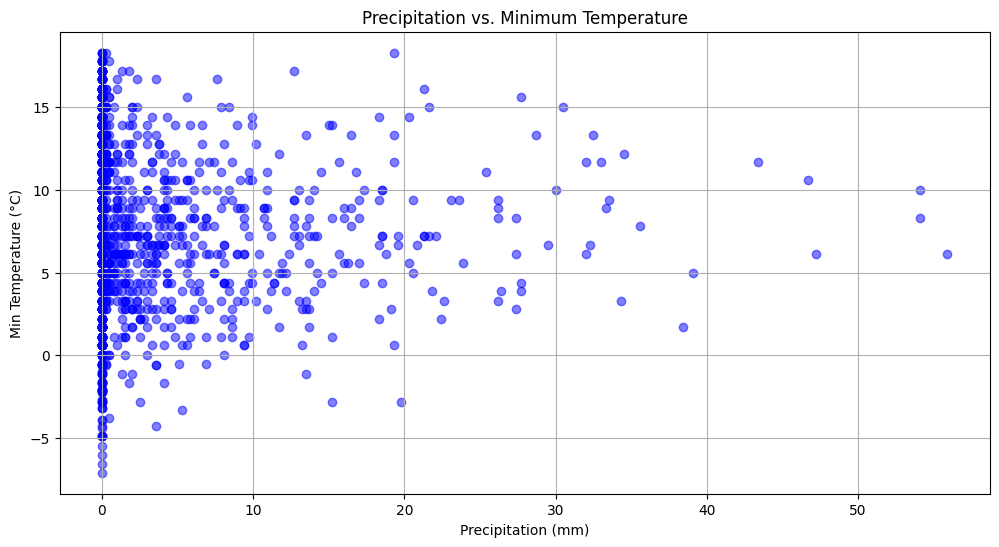

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(weather['precipitation'], weather['temp_min'], alpha=0.5, color='blue')
plt.title('Precipitation vs. Minimum Temperature')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Min Temperature (°C)')
plt.grid()
plt.show()


**Calculate Correlation**

In [ ]:
correlation_max = weather['precipitation'].corr(weather['temp_max'])
correlation_min = weather['precipitation'].corr(weather['temp_min'])

print(f'Correlation between Precipitation and Maximum Temperature: {correlation_max:.2f}')
print(f'Correlation between Precipitation and Minimum Temperature: {correlation_min:.2f}')


Correlation between Precipitation and Maximum Temperature: -0.23
Correlation between Precipitation and Minimum Temperature: -0.07


# Time Series Analysis> ****
> Resample or aggregate data****

In [ ]:
# Reload the file to inspect the first few rows
print(weather.head())
print("Columns:", weather.columns)


            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain
Columns: Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [ ]:
import pandas as pd

# Assuming 'weather' is your DataFrame and is already indexed by 'date'

# Step 1: Check the data types of the columns
print(weather.dtypes)

# Step 2: Resample data to get the monthly mean, excluding non-numeric columns
# Using .select_dtypes to include only numeric types
monthly_data = weather.select_dtypes(include='number').resample('ME').mean()

# Display the first few rows of the resampled data
print(monthly_data.head())


precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object
            precipitation   temp_max  temp_min      wind
date                                                    
2012-01-31       5.590323   7.054839  1.541935  3.900000
2012-02-29       3.182759   9.275862  3.203448  3.903448
2012-03-31       5.903226   9.554839  2.838710  4.248387
2012-04-30       2.270000  14.873333  5.993333  3.373333
2012-05-31       1.683871  17.661290  8.190323  3.354839


In [ ]:
# Step 2: Resample data to get the monthly mean for numeric columns
# And use first() for non-numeric columns
monthly_data = weather.resample('ME').agg({
    'precipitation': 'mean',
    'temp_max': 'mean',
    'temp_min': 'mean',
    'wind': 'mean',
    'weather': 'first'  # or use 'last', 'count', etc.
})

# Display the first few rows of the resampled data
print(monthly_data.head())


            precipitation   temp_max  temp_min      wind  weather
date                                                             
2012-01-31       5.590323   7.054839  1.541935  3.900000  drizzle
2012-02-29       3.182759   9.275862  3.203448  3.903448     rain
2012-03-31       5.903226   9.554839  2.838710  4.248387      sun
2012-04-30       2.270000  14.873333  5.993333  3.373333     rain
2012-05-31       1.683871  17.661290  8.190323  3.354839     rain


# Assuming `monthly_data` contains the monthly average data
******

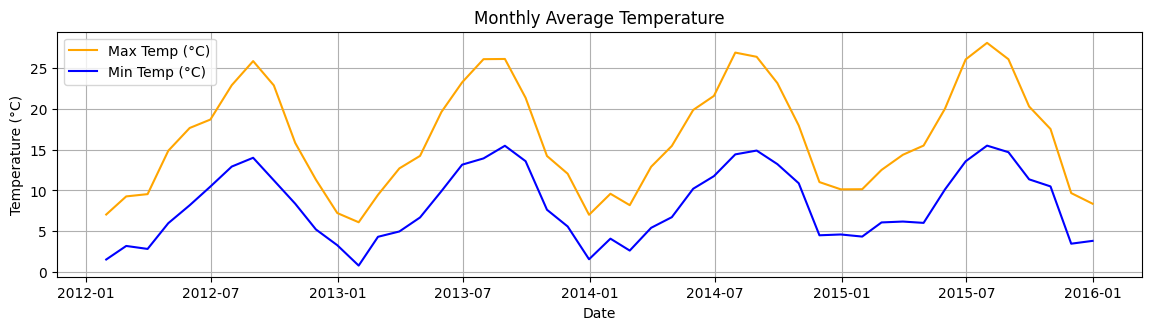

In [ ]:
plt.figure(figsize=(14, 7))

# Plotting temperature
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(monthly_data.index, monthly_data['temp_max'], label='Max Temp (°C)', color='orange')
plt.plot(monthly_data.index, monthly_data['temp_min'], label='Min Temp (°C)', color='blue')
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

# Plotting precipitation******

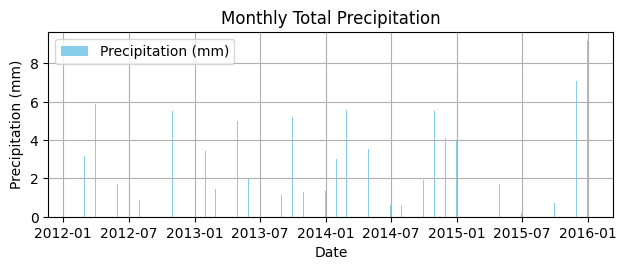

In [ ]:
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.bar(monthly_data.index, monthly_data['precipitation'], label='Precipitation (mm)', color='skyblue')
plt.title('Monthly Total Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Seasonal Analysis******

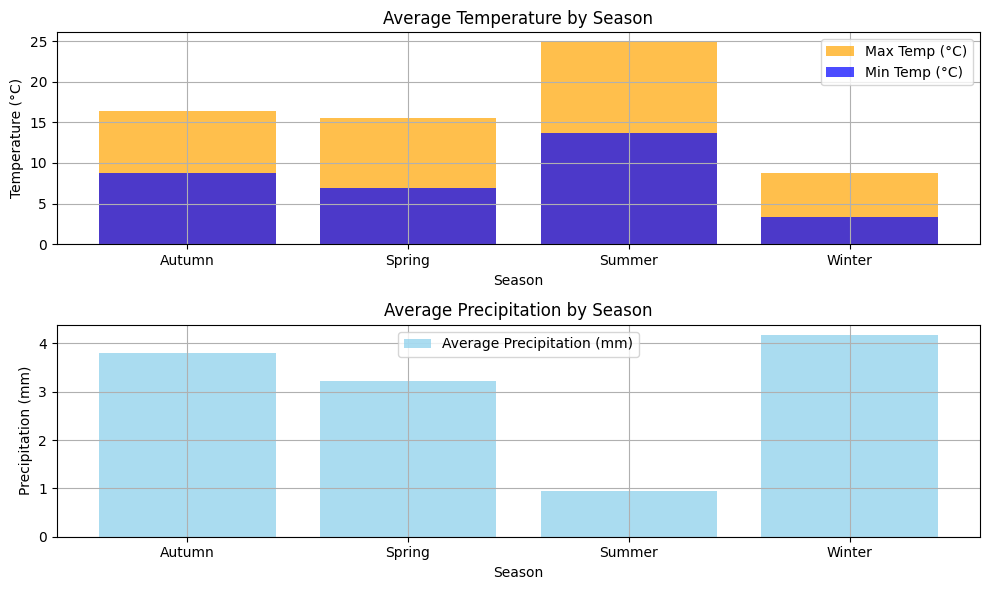

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

monthly_data['Season'] = monthly_data.index.month.map(get_season)


seasonal_data = monthly_data.select_dtypes(include='number').groupby(monthly_data['Season']).mean()


plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.bar(seasonal_data.index, seasonal_data['temp_max'], label='Max Temp (°C)', color='orange', alpha=0.7)
plt.bar(seasonal_data.index, seasonal_data['temp_min'], label='Min Temp (°C)', color='blue', alpha=0.7)
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.bar(seasonal_data.index, seasonal_data['precipitation'], label='Average Precipitation (mm)', color='skyblue', alpha=0.7)
plt.title('Average Precipitation by Season')
plt.xlabel('Season')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


#  Hypothesis Testing******

In [ ]:
print(weather.columns)


Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [ ]:
import pandas as pd


date_range = pd.date_range(start='2024-01-01', periods=len(weather), freq='D')


weather['date'] = date_range


print(weather.head())
print(weather.columns)


            precipitation  temp_max  temp_min  wind  weather       date
date                                                                   
2012-01-01            0.0      12.8       5.0   4.7  drizzle 2024-01-01
2012-01-02           10.9      10.6       2.8   4.5     rain 2024-01-02
2012-01-03            0.8      11.7       7.2   2.3     rain 2024-01-03
2012-01-04           20.3      12.2       5.6   4.7     rain 2024-01-04
2012-01-05            1.3       8.9       2.8   6.1     rain 2024-01-05
Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'date'], dtype='object')


In [ ]:

weather['month'] = weather['date'].dt.month


In [ ]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is already named 'weather' and has a 'month' column
# Filter summer (June, July, August) and winter (December, January, February) temperatures
summer_temps = weather[(weather['month'] >= 6) & (weather['month'] <= 8)]['temp_max']
winter_temps = weather[(weather['month'] <= 2) | (weather['month'] == 12)]['temp_max']


t_statistic, p_value = stats.ttest_ind(summer_temps, winter_temps, equal_var=False)


alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average temperatures.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average temperatures.")


print(f"T-statistic: {t_statistic}, P-value: {p_value}")


Reject the null hypothesis: There is a significant difference in average temperatures.
T-statistic: 55.246601008903134, P-value: 3.9768220101586495e-255


# visualizations******

**maximum temperatures in summer and winter.**

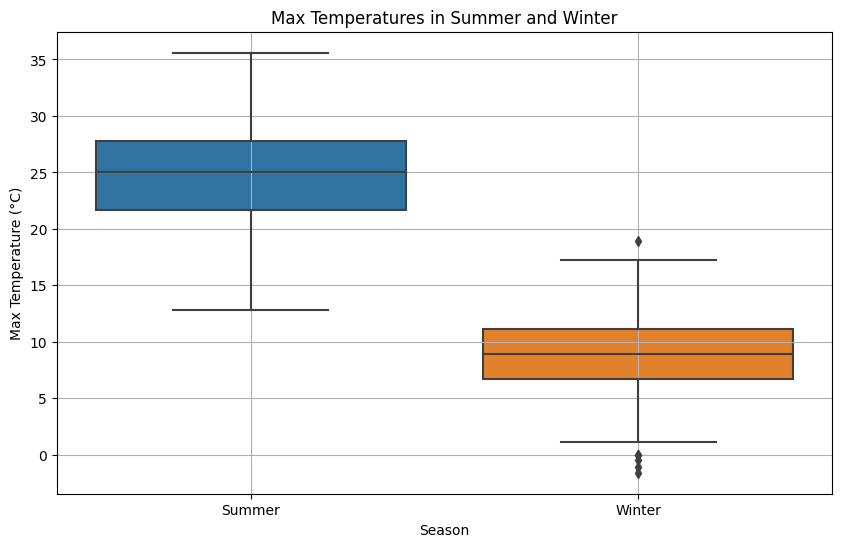

In [ ]:
plot_data = pd.DataFrame({
    'Season': ['Summer'] * len(summer_temps) + ['Winter'] * len(winter_temps),
    'Max Temperature': list(summer_temps) + list(winter_temps)
})

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Max Temperature', data=plot_data)
plt.title('Max Temperatures in Summer and Winter')
plt.xlabel('Season')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.show()

**additional insights into the distribution of temperatures**

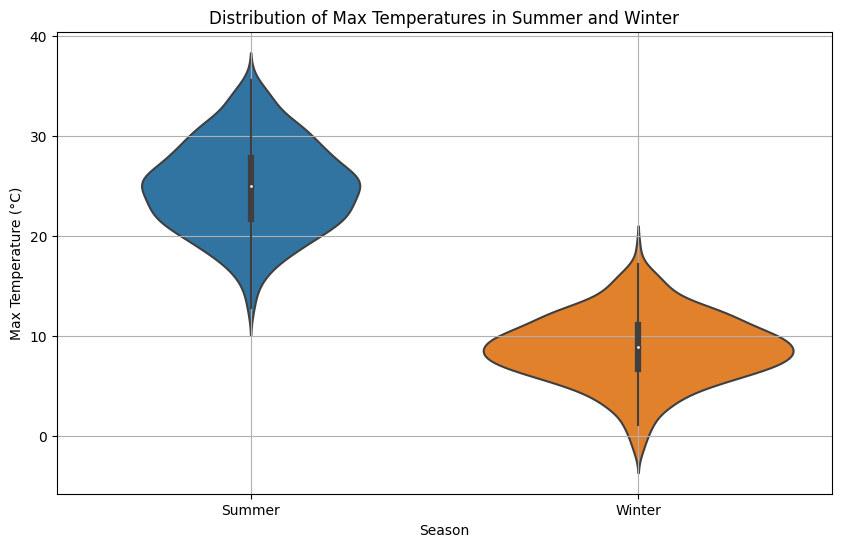

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='Max Temperature', data=plot_data)
plt.title('Distribution of Max Temperatures in Summer and Winter')
plt.xlabel('Season')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.show()


# visualize the frequency of temperature occurrences******

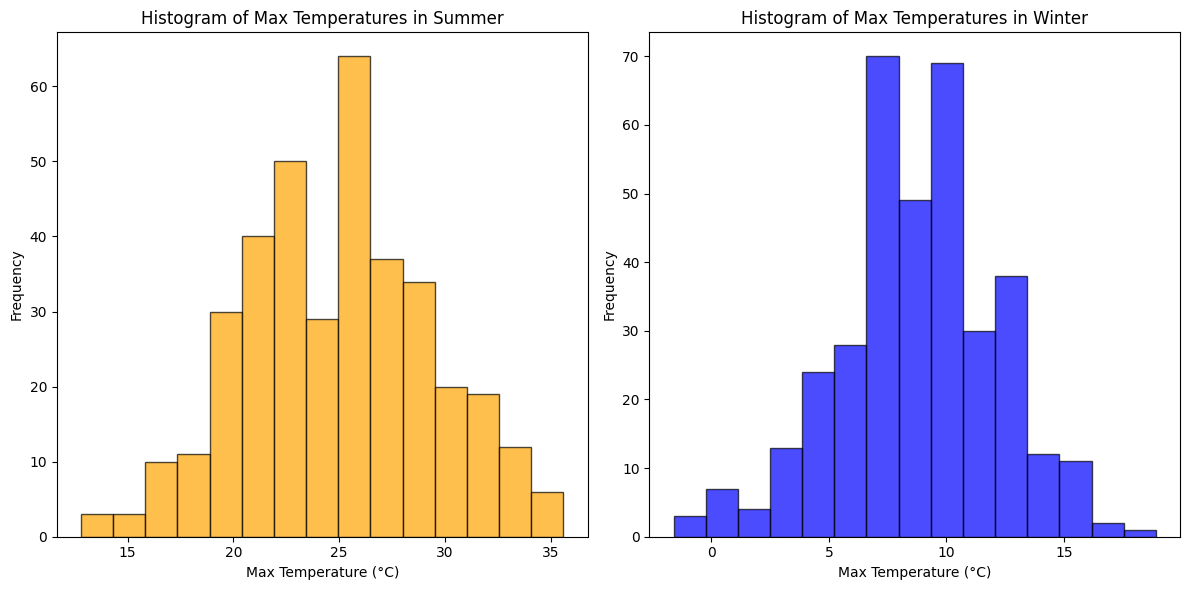

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for Summer
plt.subplot(1, 2, 1)
plt.hist(summer_temps, bins=15, alpha=0.7, color='orange', edgecolor='black')
plt.title('Histogram of Max Temperatures in Summer')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for Winter
plt.subplot(1, 2, 2)
plt.hist(winter_temps, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Max Temperatures in Winter')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
